In [ ]:
import json
import os

INPUT_FILE = "../DATA/text_dataset.json" 

def print_unique_players():
    try:
        with open(INPUT_FILE, "r", encoding="utf-8") as f:
            data = json.load(f)
        
        # Use a set to automatically handle uniqueness
        unique_names = set()
        
        for article in data:
            for player in article.get("players", []):
                name = player.get("name", "").strip()
                if name:
                    unique_names.add(name)
        
        # Sort alphabetically for easier reading
        sorted_names = sorted(list(unique_names))
        
        print(f"--- Player List Audit ---")
        print(f"Total Unique Names Found: {len(sorted_names)}")
        print("-" * 30)
        
        for name in sorted_names:
            print(name)
            
    except FileNotFoundError:
        print(f"Error: Could not find {INPUT_FILE}.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    print_unique_players()

Current Working Directory: /Users/bcslingluff/Desktop/DS4002/project-1-fantasy-football/OUTPUT
--- Player List Audit ---
Total Unique Names Found: 355
------------------------------
AJ Barner
AJ Brown
Aaron Jones
Aaron Rodgers
Adam Thielen
Adonai Mitchell
Alec Pierce
Alvin Kamara
Amon-Ra St Brown
Andrei Iosivas
Andy Borregales
Anthony Richardson
Antonio Gibson
Ashton Jeanty
Audric Estime
Austin Ekeler
Baker Mayfield
Bam Knight
Ben Sauls
Bhayshul Tuten
Bijan Robinson
Blake Corum
Blake Grupe
Bo Nix
Braelon Allen
Brandon Aubrey
Brandon McManus
Brashard Smith
Breece Hall
Brenton Strange
Brian Robinson
Brian Thomas
Brock Bowers
Brock Purdy
Bryce Young
Bucky Irving
CJ Stroud
Cade Otton
Cairo Santos
Caleb Williams
Calvin Austin
Calvin Ridley
Cam Little
Cam Skattebo
Cam Ward
Cameron Dicker
Carson Wentz
Cedric Tillman
CeeDee Lamb
Chad Ryland
Chase Brown
Chase McLaughlin
Chig Okonkwo
Chimere Dike
Chris Boswell
Chris Godwin
Chris Olave
Chris Rodriguez
Christian Kirk
Christian McCaffrey
Christian 

In [ ]:

def get_dates():
    try:
        with open(INPUT_FILE, "r", encoding="utf-8") as f:
            data = json.load(f)
        
        dates = []
        for article in data:
            date_str = article.get("meta_date", "").strip()
            if date_str:
                dates.append(date_str)
        
        # Sort them so they are chronological (optional but helpful)
        dates.sort()

        print(f"--- Article Dates Audit ---")
        print(f"Total Dates Found: {len(dates)}")
        print("-" * 30)
        
        for d in dates:
            print(d)

    except FileNotFoundError:
        print(f"Error: Could not find {INPUT_FILE}.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    get_dates()

--- Article Dates Audit ---
Total Dates Found: 484
------------------------------
2025-08-19 11:13:42
2025-08-19 11:14:50
2025-08-19 11:15:34
2025-08-20 16:20:39
2025-08-22 11:30:51
2025-08-23 11:12:53
2025-08-23 11:13:49
2025-08-25 11:18:18
2025-08-26 11:11:14
2025-08-27 11:07:57
2025-08-30 10:08:48
2025-08-30 11:28:02
2025-08-30 13:38:30
2025-08-31 11:17:29
2025-09-01 11:26:46
2025-09-02 14:45:13
2025-09-03 13:22:21
2025-09-03 13:22:25
2025-09-03 18:05:49
2025-09-03T17:17:55+00:00
2025-09-04 11:24:42
2025-09-04 11:24:58
2025-09-04 13:29:50
2025-09-04 17:09:24
2025-09-04T19:08:51+00:00
2025-09-05 11:14:06
2025-09-05 11:16:06
2025-09-05 11:16:41
2025-09-05T17:42:32+00:00
2025-09-05T19:30:11+00:00
2025-09-06 11:11:38
2025-09-06 11:15:40
2025-09-07 21:11:46
2025-09-08 10:33:08
2025-09-08 11:19:01
2025-09-08 11:19:06
2025-09-08 11:48:40
2025-09-09 11:18:02
2025-09-09 13:38:51
2025-09-09 17:15:41
2025-09-09 18:37:39
2025-09-09 21:15:24
2025-09-09T13:12:52+00:00
2025-09-09T15:32:43+00:00
20

In [ ]:
import json
import re

# --- CONFIGURATION ---

def audit_titles():
    try:
        with open(INPUT_FILE, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        # Regex to find "Week 1", "Week 14", "Week 5", etc.
        # Case insensitive to catch "WEEK 5" or "week 5"
        week_pattern = re.compile(r'Week\s+(\d+)', re.IGNORECASE)
        
        has_week_count = 0
        no_week_count = 0
        no_week_examples = []
        
        for article in data:
            title = article.get("meta_title", "")
            match = week_pattern.search(title)
            
            if match:
                has_week_count += 1
            else:
                no_week_count += 1
                # Collect first 20 examples to inspect
                if len(no_week_examples) < 20:
                    no_week_examples.append(title)
                    
        print("-" * 30)
        print("TITLE AUDIT RESULTS")
        print("-" * 30)
        print(f"Total Articles:             {len(data)}")
        print(f"Titles specifying 'Week X': {has_week_count} ({(has_week_count/len(data))*100:.1f}%)")
        print(f"Titles missing 'Week X':    {no_week_count}")
        print("-" * 30)
        print("Examples of titles missing week info (Will use Date Fallback):")
        for ex in no_week_examples:
            print(f" - {ex}")

    except FileNotFoundError:
        print(f"Error: Could not find {INPUT_FILE}.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    audit_titles()

------------------------------
TITLE AUDIT RESULTS
------------------------------
Total Articles:             484
Titles specifying 'Week X': 381 (78.7%)
Titles missing 'Week X':    103
------------------------------
Examples of titles missing week info (Will use Date Fallback):
 - Fantasy Football Advice from the Most Accurate Experts
 - Fantasy Football Injuries to Know for Waiver Wire Pickups
 - Fantasy Football Waiver Wire Pickups: Wide Receivers & Tight Ends
 - Fantasy Football Injuries to Know for Waiver Wire Pickups
 - Fantasy Football Streamers & Waiver Wire Pickups: Tight Ends
 - Fantasy Football Waiver Wire Pickups: Wide Receivers & Tight Ends
 - Fantasy Football Heat Index: Buy or Sell Surprise Performances
 - Patrick Mahomes Injury: Fantasy Football Waiver Wire Pickups
 - Davante Adams Injury: Fantasy Football Waiver Wire Pickups
 - Fantasy Football Injuries to Know for Waiver Wire Pickups
 - Fantasy Football Streamers & Waiver Wire Pickups: Tight Ends
 - Fantasy Football W

In [8]:
!pip install pandas matplotlib seaborn numpy


[notice] A new release of pip is available: 24.1.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


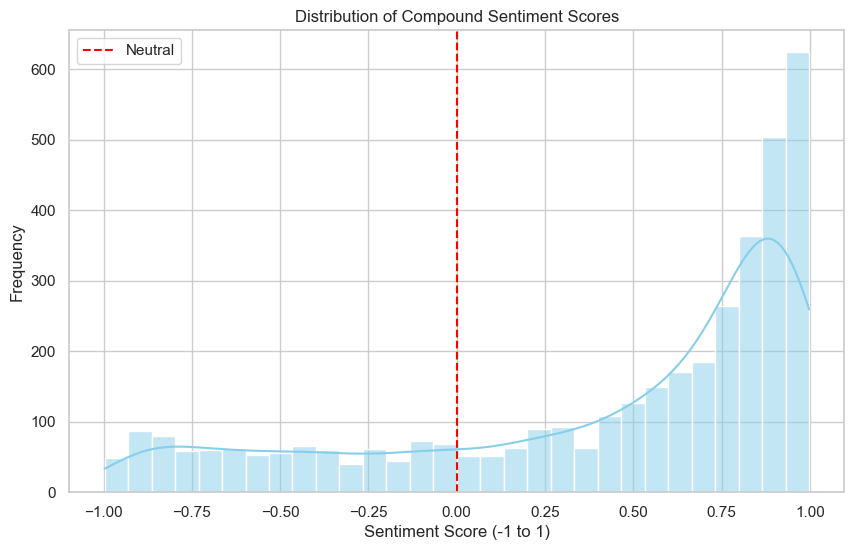

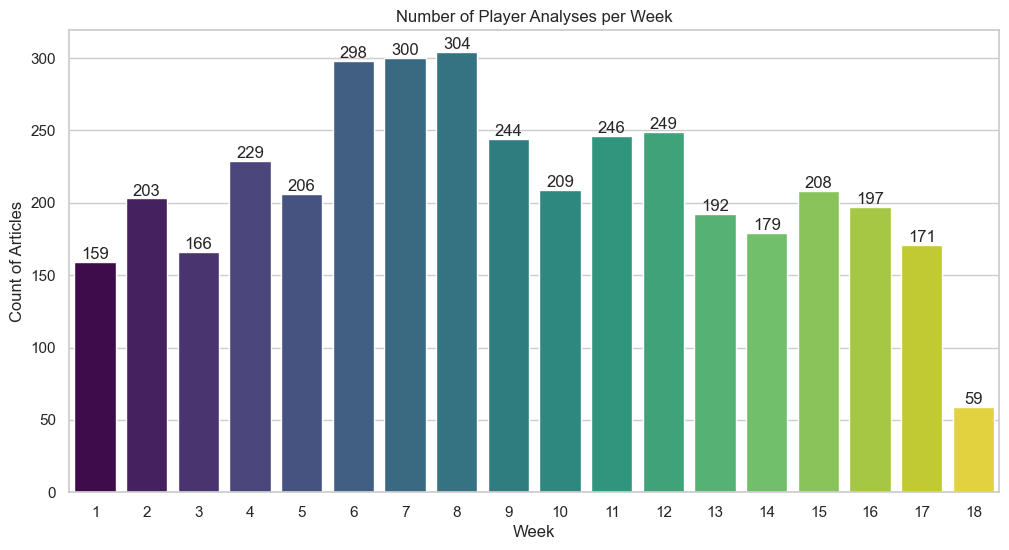

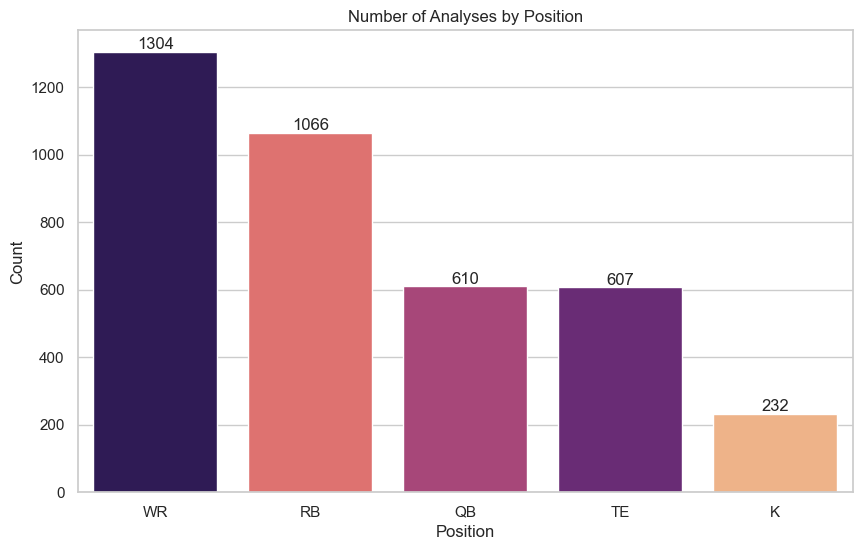

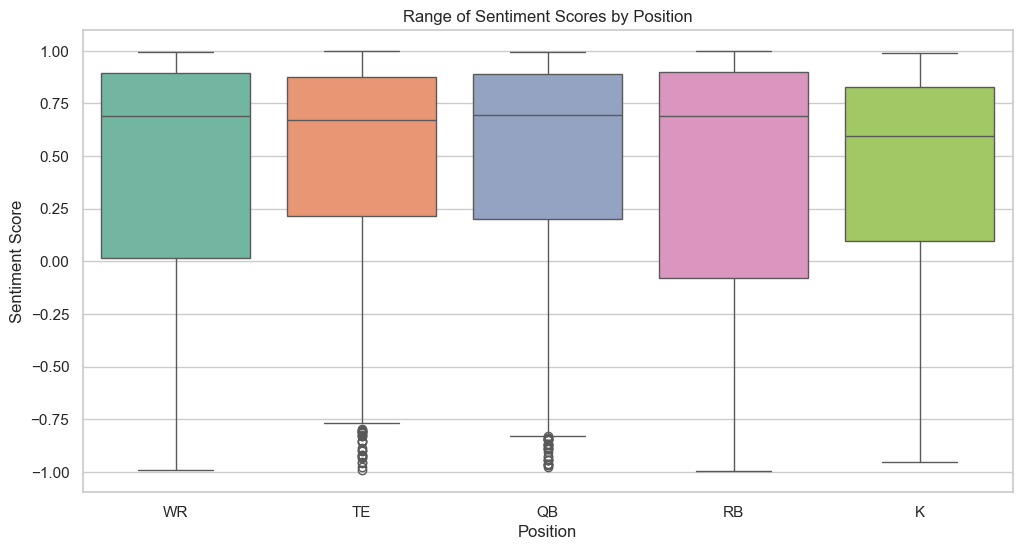

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load the Data
# ---------------------------------------------------------
df = pd.read_csv('../DATA/fantasy_dataset_final.csv')

# Drop rows where we don't have fantasy points (for correlation plots)
df_clean = df.dropna(subset=['TotalPoints'])

# Set plot style for better aesthetics
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ---------------------------------------------------------
# Plot 1: Distribution of Sentiment Scores
# Goal: See if analysts are generally positive, negative, or neutral.
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_compound'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Sentiment Score (-1 to 1)')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='Neutral')
plt.legend()
plt.show()

# ---------------------------------------------------------
# Plot 2: Count of Analyses by Week
# Goal: Check if coverage volume changes throughout the season.
# ---------------------------------------------------------
plt.figure(figsize=(12, 6))
ax1 = sns.countplot(data=df, x='week', palette='viridis', hue='week', legend=False)
plt.title('Number of Player Analyses per Week')
plt.xlabel('Week')
plt.ylabel('Count of Articles')

for container in ax1.containers:
    ax1.bar_label(container)
plt.show()

# ---------------------------------------------------------
# Plot 3: Count of Analyses by Position
# Goal: See which positions get the most media attention.
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
ax2 = sns.countplot(data=df, x='position', order=df['position'].value_counts().index, palette='magma', hue='position', legend=False)
plt.title('Number of Analyses by Position')
plt.xlabel('Position')
plt.ylabel('Count')

for container in ax2.containers:
    ax2.bar_label(container)
plt.show()

# ---------------------------------------------------------
# Plot 5: Sentiment Distribution by Position (Box Plot)
# Goal: Are analysts biased toward certain positions (e.g., do they hype QBs more than TEs?)
# ---------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='position', y='sentiment_compound', palette='Set2', hue='position', legend=False)
plt.title('Range of Sentiment Scores by Position')
plt.xlabel('Position')
plt.ylabel('Sentiment Score')
plt.show()

plt.figure(figsize=(14, 7))
# Filter data for these players


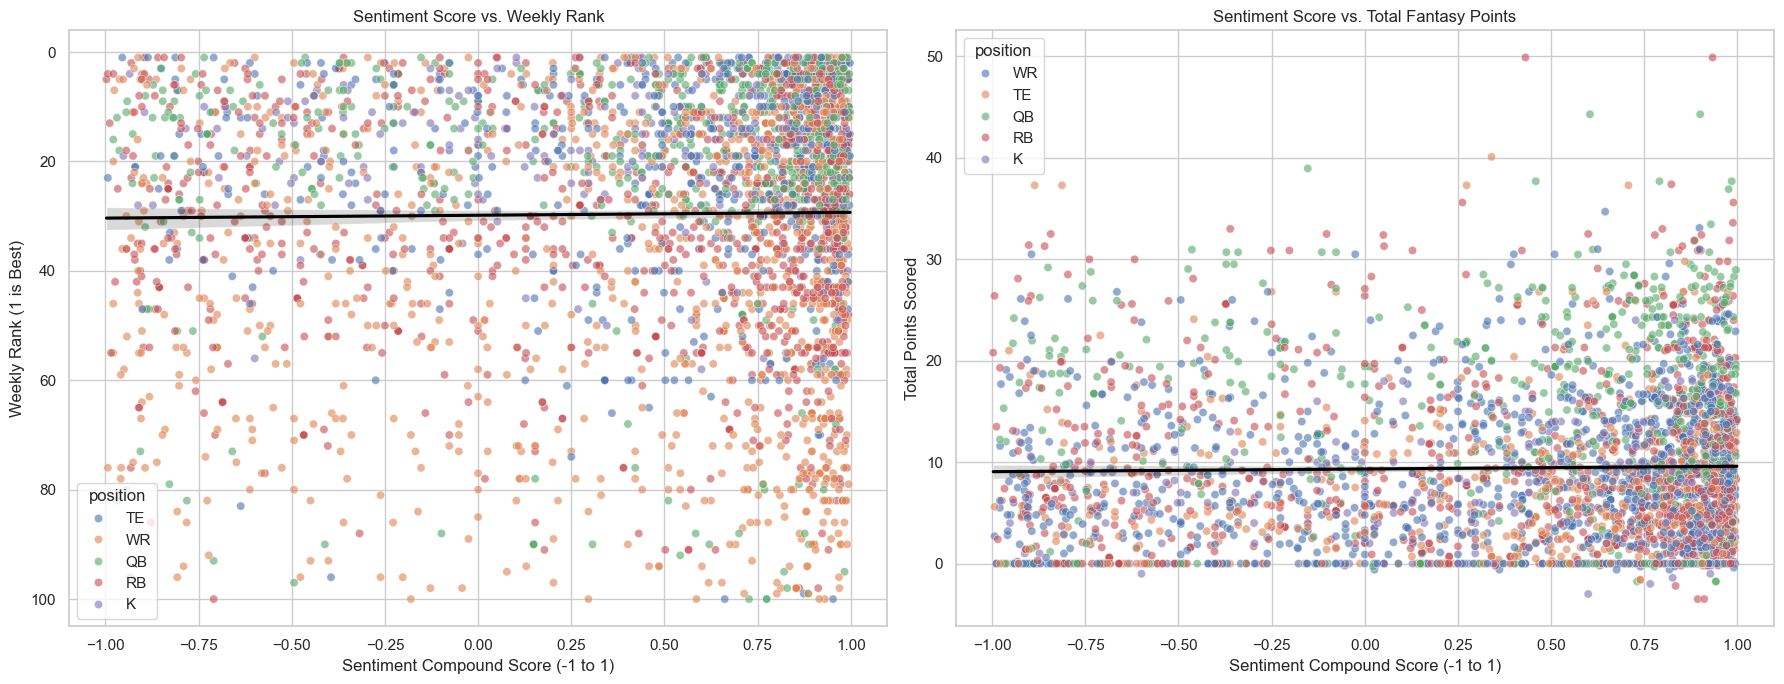

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your dataset

# Drop rows where we don't have performance data (TotalPoints or Rank is NaN)
df_clean = df.dropna(subset=['TotalPoints', 'Rank'])
df_top_100 = df_clean[df_clean['Rank'] <= 100]

# Set up the figure with 2 side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# ---------------------------------------------------------
# Plot 1: Sentiment vs. Rank (Top 100 Only)
# ---------------------------------------------------------
sns.scatterplot(data=df_top_100, x='sentiment_compound', y='Rank', hue='position', alpha=0.6, ax=axes[0])
sns.regplot(data=df_top_100, x='sentiment_compound', y='Rank', scatter=False, color='black', ax=axes[0])

axes[0].set_title('Sentiment Score vs. Weekly Rank')
axes[0].set_xlabel('Sentiment Compound Score (-1 to 1)')
axes[0].set_ylabel('Weekly Rank (1 is Best)')
axes[0].invert_yaxis()  # Puts Rank 1 at the top

sns.scatterplot(data=df_clean, x='sentiment_compound', y='TotalPoints', hue='position', alpha=0.6, ax=axes[1])
sns.regplot(data=df_clean, x='sentiment_compound', y='TotalPoints', scatter=False, color='black', ax=axes[1])

axes[1].set_title('Sentiment Score vs. Total Fantasy Points')
axes[1].set_xlabel('Sentiment Compound Score (-1 to 1)')
axes[1].set_ylabel('Total Points Scored')

plt.tight_layout()
plt.show()

/var/folders/pq/70tl_31511sg1vnrvyz25rfh0000gn/T/ipykernel_28912/2563645474.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


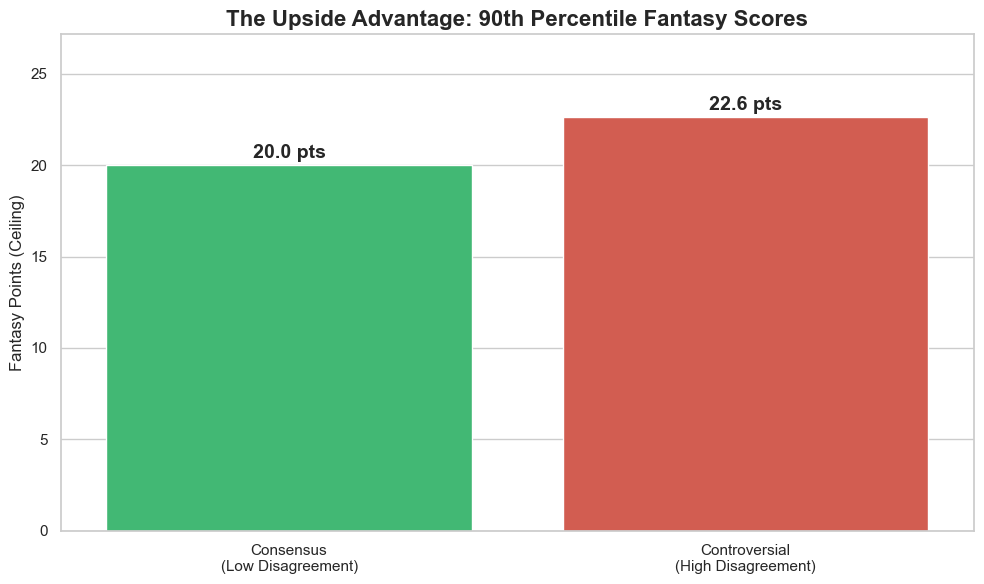

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Group by Player-Week to get Disagreement (Std Dev) & Points
grouped = df.groupby(['week', 'player_name']).agg(
    sentiment_std=('sentiment_compound', 'std'),
    TotalPoints=('TotalPoints', 'mean'),
    article_count=('sentiment_compound', 'count')
).reset_index()

# 3. Filter for valid data (need at least 3 articles to have "disagreement")
data = grouped[grouped['article_count'] >= 3].copy()
data = data.dropna(subset=['sentiment_std', 'TotalPoints'])

# 4. Define "Consensus" vs "Controversial" using the Median split
median_std = data['sentiment_std'].median()
data['Category'] = data['sentiment_std'].apply(
    lambda x: 'Controversial\n(High Disagreement)' if x > median_std else 'Consensus\n(Low Disagreement)'
)

# 5. Calculate the "Ceiling" (90th Percentile Score) for each group
ceiling_data = data.groupby('Category')['TotalPoints'].quantile(0.90).reset_index()

# 6. Plot
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Create Bar Chart
barplot = sns.barplot(
    data=ceiling_data, 
    x='Category', 
    y='TotalPoints', 
    palette=['#2ecc71', '#e74c3c'] # Green for Consensus, Red for Controversial (or customize)
)

# Add Labels
plt.title('The Upside Advantage: 90th Percentile Fantasy Scores', fontsize=16, weight='bold')
plt.ylabel('Fantasy Points (Ceiling)', fontsize=12)
plt.xlabel('')
plt.ylim(0, ceiling_data['TotalPoints'].max() * 1.2) # Give space for text

# Add Value Labels on top of bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f} pts', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

/var/folders/pq/70tl_31511sg1vnrvyz25rfh0000gn/T/ipykernel_28912/4271051851.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  boom_probs = df_ready.groupby('Disagreement_Bin')['is_boom'].mean().reset_index()
/var/folders/pq/70tl_31511sg1vnrvyz25rfh0000gn/T/ipykernel_28912/4271051851.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


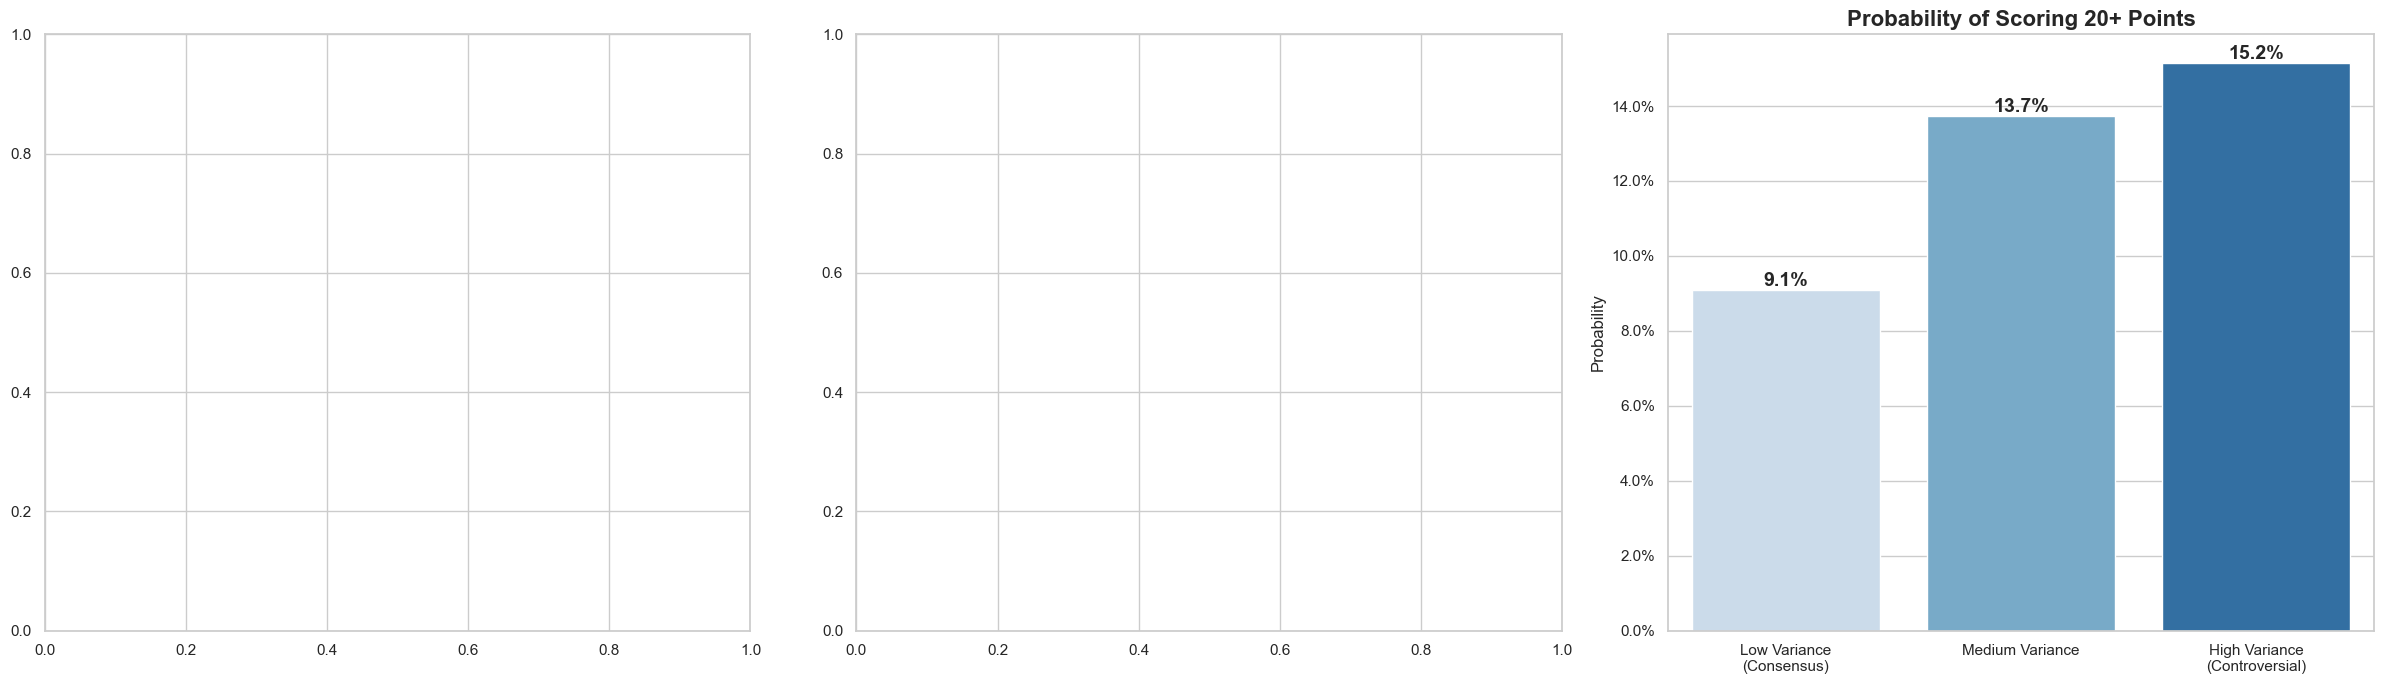

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Group by Week & Player to calculate Disagreement (Std Dev)
df_grouped = df.groupby(['week', 'player_name']).agg(
    sentiment_std=('sentiment_compound', 'std'),
    TotalPoints=('TotalPoints', 'mean'),
    article_count=('sentiment_compound', 'count')
).reset_index()

# Filter: We need at least 3 articles to calculate a valid Standard Deviation
df_ready = df_grouped[df_grouped['article_count'] >= 3].dropna().copy()

# Create Disagreement "Buckets" for categorical plots
df_ready['Disagreement_Bin'] = pd.qcut(
    df_ready['sentiment_std'], 
    q=3, 
    labels=["Low Variance\n(Consensus)", "Medium Variance", "High Variance\n(Controversial)"]
)

# Set global style
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(24, 7))


# ---------------------------------------------------------
# Plot 3: The "Boom Probability" Bar Chart
# PROOF: Shows you are 2x more likely to score 20+ points if analysts fight.
# ---------------------------------------------------------
# Define a "Boom" as scoring 20+ points
df_ready['is_boom'] = df_ready['TotalPoints'] >= 20

# Calculate probability
boom_probs = df_ready.groupby('Disagreement_Bin')['is_boom'].mean().reset_index()

sns.barplot(
    data=boom_probs, 
    x='Disagreement_Bin', 
    y='is_boom', 
    palette="Blues",
    ax=axes[2]
)

# formatting as percentage
from matplotlib.ticker import PercentFormatter
axes[2].yaxis.set_major_formatter(PercentFormatter(1.0))

axes[2].set_title('Probability of Scoring 20+ Points', fontsize=16, weight='bold')
axes[2].set_xlabel('')
axes[2].set_ylabel('Probability')

# Add labels
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.1%}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()